In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from class2 import facies_classification, Petrophysics, rename_columns, rearrange_columns

In [49]:
well = pd.read_csv('data/freeman_well_4_perm.csv')
well.head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM
0,7564.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
1,7565.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
2,7565.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
3,7566.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
4,7566.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364


In [50]:
old_names = ['DEPT', 'DEN', 'NEUT', 'RES_DEP']#list(well.columns)
new_names = ['Depth', 'RHOB', 'NPHI', 'Log_ILD']
df = rename_columns(well, old_names, new_names)

In [32]:
order = ['Depth', 'GR', 'Log_ILD', 'DT', 'RHOB', 'NPHI'. 'PHI', 'PER']
data = rearrange_columns(df, order)

In [33]:
data.head()

,Depth,Gamma Ray,Deep Resistivity,Sonic,Density,Neutron
0,7564.5,NaN,NaN,137.507,2.2382,NaN
1,7565.0,NaN,NaN,137.507,2.2382,NaN
2,7565.5,NaN,NaN,137.507,2.2382,NaN
3,7566.0,NaN,NaN,137.507,2.2382,NaN
4,7566.5,NaN,NaN,137.507,2.2382,NaN


In [35]:
data['Facies'] = facies_classification(data['Gamma Ray'])

In [36]:
data.head()

,Depth,Gamma Ray,Deep Resistivity,Sonic,Density,Neutron,Facies
0,7564.5,NaN,NaN,137.507,2.2382,NaN,None
1,7565.0,NaN,NaN,137.507,2.2382,NaN,None
2,7565.5,NaN,NaN,137.507,2.2382,NaN,None
3,7566.0,NaN,NaN,137.507,2.2382,NaN,None
4,7566.5,NaN,NaN,137.507,2.2382,NaN,None


In [37]:
data['Facies'].unique()

array(['None', 'sand', 'shaly sand', 'shale'], dtype=object)

In [38]:
test = Petrophysics(data)

In [39]:
x = test.slowness_to_velocity(2)

In [40]:
data.head()

,Depth,Gamma Ray,Deep Resistivity,Sonic,Density,Neutron,Facies,velocity
0,7564.5,NaN,NaN,137.507,2.2382,NaN,None,NaN
1,7565.0,NaN,NaN,137.507,2.2382,NaN,None,NaN
2,7565.5,NaN,NaN,137.507,2.2382,NaN,None,NaN
3,7566.0,NaN,NaN,137.507,2.2382,NaN,None,NaN
4,7566.5,NaN,NaN,137.507,2.2382,NaN,None,NaN


In [41]:
data.describe()

,Depth,Gamma Ray,Deep Resistivity,Sonic,Density,Neutron,velocity
count,7586.000000,7352.000000,7350.000000,7586.000000,7586.000000,7352.000000,7.350000e+03
mean,9460.750000,108.189529,18.933387,118.441103,2.326999,0.423099,9.424697e+05
std,1095.016952,23.541196,176.943528,11.924260,0.081725,0.066108,4.069030e+05
min,7564.500000,32.593900,0.081200,84.811200,1.863100,0.099500,5.128205e+02
25%,8512.625000,101.771775,0.878350,108.603500,2.272600,0.385175,7.307805e+05
50%,9460.750000,112.463100,1.025600,115.442700,2.342500,0.422200,9.750390e+05
75%,10408.875000,120.219250,1.368400,128.824075,2.390700,0.461400,1.138498e+06
max,11357.000000,219.338000,1950.000000,158.538400,2.564600,0.656900,1.231527e+07


In [ ]:
# 1=sandstone  2=c_siltstone   3=f_siltstone 
# 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
# 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)

In [12]:
well.to_csv('data/freeman_well_4.csv', index=False)

In [27]:
import pandas as pd
df = pd.read_csv('data/freeman_well_4_perm.csv')
df.head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM
0,7564.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
1,7565.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
2,7565.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
3,7566.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
4,7566.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364


In [28]:
from class2 import facies_classification, Petrophysics
df['Facies'] = facies_classification(well['GR'])
df

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM,Facies
0,7564.5,2.2382,137.5070,NaN,NaN,NaN,0.2657,175.29364,none
1,7565.0,2.2382,137.5070,NaN,NaN,NaN,0.2657,175.29364,none
2,7565.5,2.2382,137.5070,NaN,NaN,NaN,0.2657,175.29364,none
3,7566.0,2.2382,137.5070,NaN,NaN,NaN,0.2657,175.29364,none
4,7566.5,2.2382,137.5070,NaN,NaN,NaN,0.2657,175.29364,none
...,...,...,...,...,...,...,...,...,...
7581,11355.0,2.3986,111.3281,162.1151,0.551,0.9417,0.1622,1.49274,shale
7582,11355.5,2.3986,111.3281,162.1151,0.551,0.9418,0.1622,1.49274,shale
7583,11356.0,2.3986,111.3281,162.1151,0.551,0.9418,0.1622,1.49274,shale
7584,11356.5,2.3986,111.3281,162.1151,0.551,0.9419,0.1622,1.49274,shale


In [29]:
test = Petrophysics(df)
x = test.slowness_to_velocity(2)

In [30]:
x.head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM,Facies,velocity
0,7564.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044
1,7565.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044
2,7565.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044
3,7566.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044
4,7566.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044


In [31]:
x.to_csv('data/well_4_ML.csv', index=False)

In [32]:
data = pd.read_csv('data/well_4_ML.csv')

In [33]:
data.head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM,Facies,velocity
0,7564.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044
1,7565.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044
2,7565.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044
3,7566.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044
4,7566.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,none,7272.357044


# FEATURE ENGINEERING

Detecting outlier ussing Z Score method

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [2]:
df = pd.read_csv('data/freeman_well_4_perm.csv')
df.head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM
0,7564.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
1,7565.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
2,7565.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
3,7566.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364
4,7566.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364


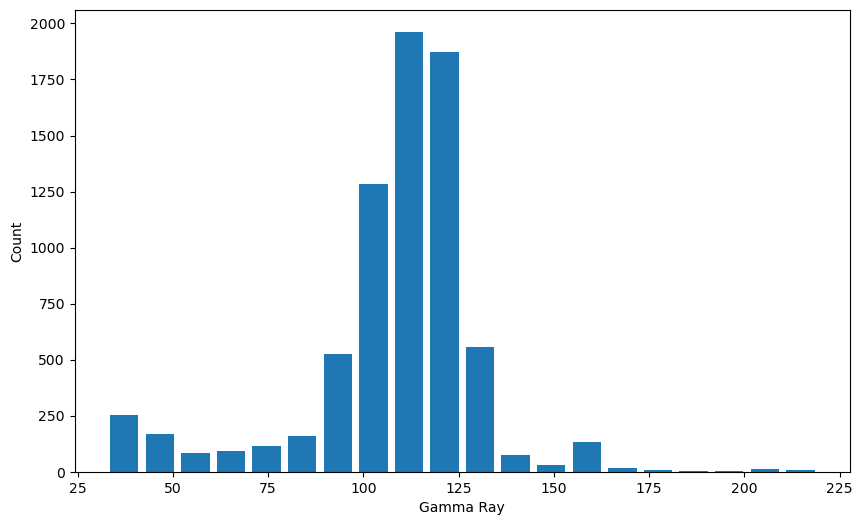

In [3]:
plt.hist(df.GR, bins=20, rwidth=0.8)
plt.xlabel('Gamma Ray')
plt.ylabel('Count')
plt.show()

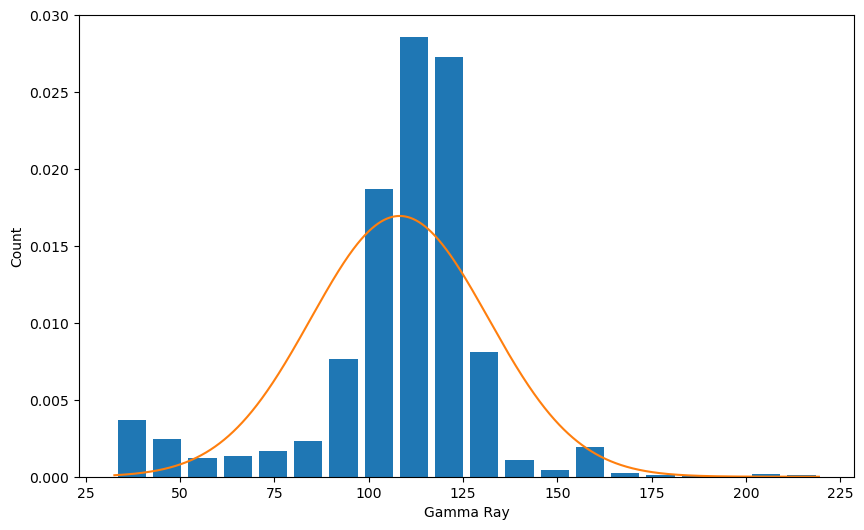

In [4]:
from scipy.stats import norm

plt.hist(df.GR, bins=20, rwidth=0.8, density=True)
plt.xlabel('Gamma Ray')
plt.ylabel('Count')

rng = np.arange(df.GR.min(), df.GR.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.GR.mean(),df.GR.std()))

In [5]:
df.GR.mean()

108.18952928454911

In [6]:
df.GR.std()

23.5411961087997

# Outlier detection and removal using Z Score

In [7]:
df['zscore'] = ( df.GR - df.GR.mean() ) / df.GR.std()
df.head(5)

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM,zscore
0,7564.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,NaN
1,7565.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,NaN
2,7565.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,NaN
3,7566.0,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,NaN
4,7566.5,2.2382,137.507,NaN,NaN,NaN,0.2657,175.29364,NaN


In [8]:
df[df['zscore']>3].head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM,zscore
7422,11275.5,2.3811,112.0898,182.0136,0.4502,0.8267,0.1735,2.511657,3.135952
7423,11276.0,2.3959,112.4967,190.3772,0.4400,0.8160,0.1639,1.614287,3.491227
7424,11276.5,2.4047,112.7246,189.7021,0.4323,0.7965,0.1583,1.247362,3.462550
7425,11277.0,2.4081,113.5807,181.9346,0.4279,0.7820,0.1561,1.127190,3.132597
7426,11277.5,2.4042,113.2389,179.6507,0.4497,0.8000,0.1586,1.264712,3.035579


In [9]:
df[df['zscore']<-3].head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM,zscore
378,7753.5,2.2382,137.507,36.3887,0.6023,0.9332,0.2657,175.29364,-3.050008
379,7754.0,2.2382,137.507,33.2530,0.5853,0.9332,0.2657,175.29364,-3.183208
380,7754.5,2.2382,137.507,33.9191,0.6019,0.9332,0.2657,175.29364,-3.154913
384,7756.5,2.2382,137.507,35.6284,0.5703,0.9332,0.2657,175.29364,-3.082304
385,7757.0,2.2382,137.507,37.3668,0.5627,0.9332,0.2657,175.29364,-3.008459


In [10]:
df[(df.zscore<-3) | (df.zscore>3)].head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM,zscore
378,7753.5,2.2382,137.507,36.3887,0.6023,0.9332,0.2657,175.29364,-3.050008
379,7754.0,2.2382,137.507,33.2530,0.5853,0.9332,0.2657,175.29364,-3.183208
380,7754.5,2.2382,137.507,33.9191,0.6019,0.9332,0.2657,175.29364,-3.154913
384,7756.5,2.2382,137.507,35.6284,0.5703,0.9332,0.2657,175.29364,-3.082304
385,7757.0,2.2382,137.507,37.3668,0.5627,0.9332,0.2657,175.29364,-3.008459


In [11]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,DEPT,DEN,DT,GR,NEUT,RES_DEP,PHI,PERM,zscore
234,7681.5,2.2382,137.507,39.0321,0.5983,NaN,0.2657,175.29364,-2.937719
235,7682.0,2.2382,137.507,39.0321,0.5983,NaN,0.2657,175.29364,-2.937719
236,7682.5,2.2382,137.507,39.0321,0.5983,0.9332,0.2657,175.29364,-2.937719
237,7683.0,2.2382,137.507,39.0321,0.5983,0.9332,0.2657,175.29364,-2.937719
238,7683.5,2.2382,137.507,39.0321,0.5983,0.9332,0.2657,175.29364,-2.937719


In [12]:
df_no_outliers.shape

(7288, 9)

In [13]:
df.shape

(7586, 9)

In [25]:
tops = ('Lower Pliocene', 'Upper Miocene', 'MFS 5.0', 'Top Upper Miocene', 'MFS 6.0', 'MFS 7.4', 'Middle Miocene',
            'MFS 9.5', 'Top Middl Miocene')
tops_depths = (1508.76, 1889.76, 1954.92, 2094.59, 2182.99, 2349.8, 2559.63, 2620.07, 2674.83)

In [26]:
# Create the figure and subplots
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=df[(df.Depth >= top_depth) & (df.Depth <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,10), sharey=True)
    fig.suptitle("Well Composite", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)

#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=0.5, color='black')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
    
        
#1st track: GR, CALI, SP track
    
#    ax01=ax[0].twiny()
#    ax01.set_xlim(-100,10)
#    ax01.spines['top'].set_position(('outward',0))
#    ax01.set_xlabel("SP [mV]")
#    ax01.plot(logs.SP, logs.DEPT, label='SP[mV]', color='blue')
#    ax01.set_xlabel('SP[mV]',color='blue')    
#    ax01.tick_params(axis='x', colors='blue')
#    ax01.grid(True)
    
    
#    ax02=ax[0].twiny()
#    ax02.set_xlim(6,36)
#    ax02.plot(logs.CALI, logs.DEPT, '--', label='CALN[in]', color='black') 
#    ax02.spines['top'].set_position(('outward',40))
#    ax02.set_xlabel('CALI[in]',color='black')    
#    ax02.tick_params(axis='x', colors='black')
    
    ax03=ax[0].twiny()
    ax03.set_xlim(0,150)
    ax03.plot(logs['Gamma Ray'], logs.Depth, label='GR[api]', color='green') 
    ax03.spines['top'].set_position(('outward',80))
    ax03.set_xlabel('GR[api]',color='green')    
    ax03.tick_params(axis='x', colors='green')
    
#2nd track: Resistivities

    ax11=ax[1].twiny()
    ax11.set_xlim(0.2,200)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',80))
    ax11.set_xlabel('ILD[m.ohm]', color='red')
    ax11.plot(logs['Deep Resistivity'], logs.Depth, label='ILD[m.ohm]', color='red')
    ax11.tick_params(axis='x', colors='red')    
    
#    ax12=ax[1].twiny()
#    ax12.set_xlim(0.1,100)
#    ax12.set_xscale('log')
#    ax12.plot(logs.ILM, logs.DEPT, label='ILM[m.ohm]', color='purple') 
#    ax12.spines['top'].set_position(('outward',40))
#    ax12.set_xlabel('ILM[m.ohm]', color='purple')    
#    ax12.tick_params(axis='x', colors='purple')
    
        
#    ax13=ax[1].twiny()
#    ax13.set_xlim(0.1,100)
#    ax13.set_xscale('log')
#    ax13.plot(logs.LL8, logs.DEPT, '--',label='LL8[m.ohm]', color='black') 
#    ax13.spines['top'].set_position(('outward',0))
#    ax13.set_xlabel('LL8[m.ohm]',color='black')
#    ax13.tick_params(axis='x', colors='black')

    
#3rd track: RHOB, NPHI track
    
    ax21=ax[2].twiny()
    ax21.grid(True)
    ax21.set_xlim(140,40)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel('DT[us/ft]')
    ax21.plot(logs.Sonic, logs.Depth, label='DT[us/ft]', color='blue')
    ax21.set_xlabel('DT[us/ft]', color='blue')    
    ax21.tick_params(axis='x', colors='blue')
    
    ax22=ax[2].twiny()
    ax22.set_xlim(-15,45)
    ax22.invert_xaxis()
    ax22.plot(logs.Neutron, logs.Depth, label='NPHI[%]', color='green') 
    ax22.spines['top'].set_position(('outward',40))
    ax22.set_xlabel('NPHI[%]', color='green')    
    ax22.tick_params(axis='x', colors='green')
    
    ax23=ax[2].twiny()
    ax23.set_xlim(1.95,2.95)
    ax23.plot(logs.Density, logs.Depth ,label='RHOB[g/cc]', color='red') 
    ax23.spines['top'].set_position(('outward',80))
    ax23.set_xlabel('RHOB[g/cc]',color='red')
    ax23.tick_params(axis='x', colors='red')
    

#3rd track: DT track

    
    #plt.savefig ('triple_combo_plot.png', dpi=200, format='png')

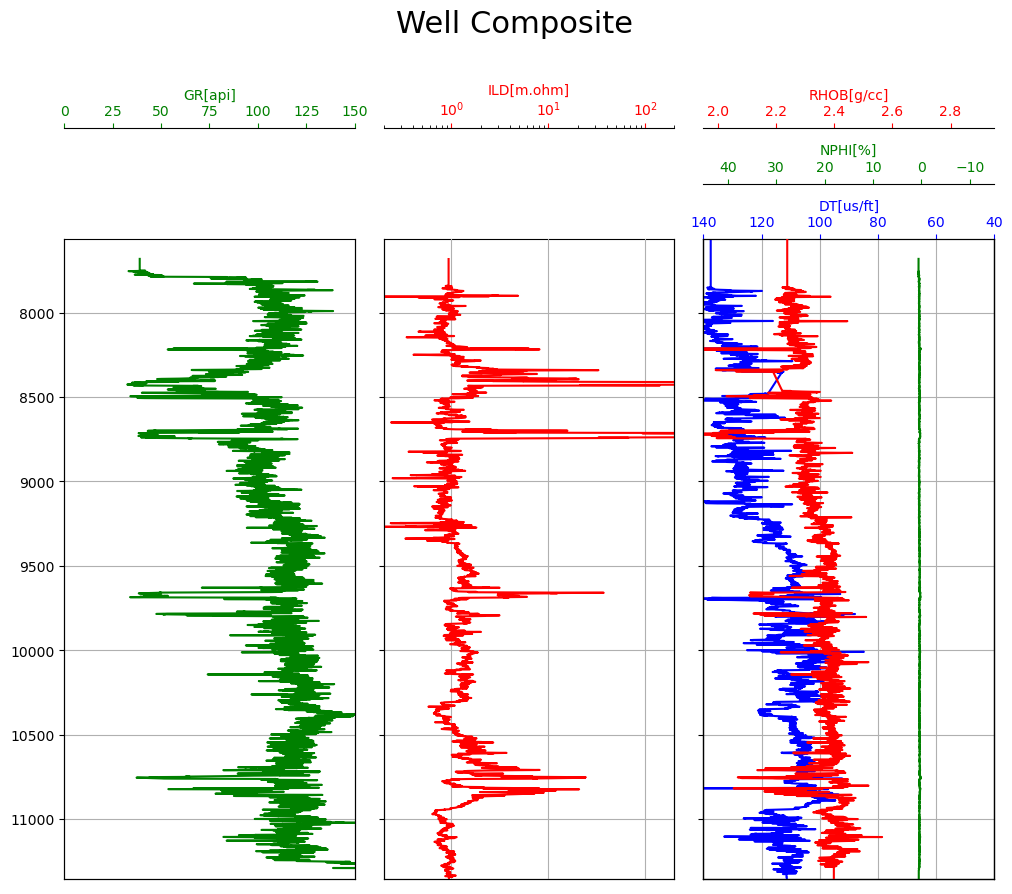

In [27]:
#%matplotlib nbagg

triple_combo_plot(data.Depth.min(),data.Depth.max())

In [ ]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
import matplotlib as mpl
import seaborn as sns

In [ ]:
#del facies_colors, facies_labels

facies_colors = ['r', 'b','g','#6E2C00',
       '#1B4F72','k', '#AED6F1', '#A569BD']

facies_labels = [0, 1, 2, 3, 4, 5, 6,7]

# facies_colors = ['r', 'b','g','#6E2C00',
#        '#1B4F72','k']

# facies_labels = [0, 1, 2, 3, 4,
#                  5]

In [ ]:
def make_facies_log_plot(logs, facies_colors,Formation_name,top):
    
    logs = logs.sort_values(by='DEPT')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.DEPT.min(); zbot=logs.DEPT.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies_pred'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(19, 16))
    ax[0].plot(logs.GR, logs.DEPT, '-g',linewidth=2)
    ax[1].plot(logs.NPLS, logs.DEPT, '-',linewidth=2)
    ax[2].plot(logs.RHOB, logs.DEPT, '-', color='0.5',linewidth=2)
    ax[3].plot(logs.DT, logs.DEPT, '-', color='r',linewidth=2)
    ax[4].plot(logs.PE, logs.DEPT, '-', color='black',linewidth=2)
    ax[5].plot(logs.Log_ILD, logs.DEPT, '-', color='purple',linewidth=2)
    im=ax[6].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=8)
#     im=ax[6].imshow(cluster, interpolation='none', aspect='auto',
#                     cmap=cmap_facies,vmin=1,vmax=6)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((30*' ').join(['1', '2', 
                                '3', '4 ', ' 5 ', ' 6  ', 
                                ' 7 ','8']))
#     cbar.set_label((35*' ').join(['1', '2', 
#                                  '3', '4 ', ' 5 ', ' 6  ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    
    tick_inter = [80,10,0.3,20, 1.1,1.0]
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid(which='minor',axis='both')
        ax[i].locator_params(axis='x', nbins=3)
        
        
    tops = len(Formation_name)
    
    for k in range(tops):
                
    
        ax[0].set_xlabel("GR (api)",fontsize=15)
        ax[0].set_xlim(logs.GR.min(),logs.GR.max())
        ax[0].xaxis.set_ticks(np.arange(0, int(logs.GR.max()), tick_inter[0]))
        ax[0].xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0i'))
        y = top[k] * np.ones((len(logs.GR),1))
        x = logs.GR
        ax[0].plot(x,y,'y',linewidth=1)
        ax[0].text(200,top[k]-10,Formation_name[k],fontsize=12,bbox=dict(facecolor='yellow', alpha=0.05))

        ax[1].set_xlabel("NPLS (%)",fontsize=15)
        ax[1].set_xlim(logs.NPLS.min(),logs.NPLS.max())
        ax[1].xaxis.set_ticks(np.arange(0, int(logs.NPLS.max()), tick_inter[1]))
        ax[1].xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0i'))
        y = top[k] * np.ones((len(logs.NPLS),1))
        x = logs.NPLS
        ax[1].plot(x,y,'y',linewidth=1)

        ax[2].set_xlabel("RHOB (g/cm^{3})",fontsize=15)
        ax[2].set_xlim(logs.RHOB.min(),logs.RHOB.max())
        ax[2].xaxis.set_ticks(np.arange(logs.RHOB.min(), (logs.RHOB.max()), tick_inter[2]))
        ax[2].xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
        y = top[k] * np.ones((len(logs.RHOB),1))
        x = logs.RHOB
        ax[2].plot(x,y,'y',linewidth=1)
        
        
        ax[3].set_xlabel("DT (μs/ft)",fontsize=15)
        ax[3].set_xlim(logs.DT.min(),logs.DT.max())
        ax[3].xaxis.set_ticks(np.arange(logs.DT.min(), int(logs.DT.max()), tick_inter[3]))
        ax[3].xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0i'))
        y = top[k] * np.ones((len(logs.DT),1))
        x = logs.DT
        ax[3].plot(x,y,'y',linewidth=1)

        ax[4].set_xlabel("PE (b/E)",fontsize=15)
        ax[4].set_xlim(logs.PE.min(),logs.PE.max())
        ax[4].xaxis.set_ticks(np.arange(logs.PE.min(), (logs.PE.max()), tick_inter[4]))
        ax[4].xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
        y = top[k] * np.ones((len(logs.PE),1))
        x = logs.PE
        ax[4].plot(x,y,'y',linewidth=1)
        
        ax[5].set_xlabel("Log_ILD (Ω/m)",fontsize=15)
        ax[5].set_xlim(logs.Log_ILD.min(),logs.PE.max())
        ax[5].xaxis.set_ticks(np.arange(logs.Log_ILD.min(), (logs.Log_ILD.max()), tick_inter[5]))
        ax[5].xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
        y = top[k] * np.ones((len(logs.Log_ILD),1))
        x = logs.Log_ILD
        ax[5].plot(x,y,'y',linewidth=1)

        ax[6].set_xlabel('Facies',fontsize=15)

        ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
        ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
        ax[6].set_xticklabels([])
        f.suptitle('Well: %s'%logs.iloc[0]['Well name'], fontsize=14,y=0.94)
        
    #f.tight_layout()
        

In [ ]:
Formation_name= ['Heebner','Lansing','Kansas City','Hunton','Maquoketa','Viola','Simpson','Simpson sandstone']
top = [516,703,875,1281,1864,1928,2152,2276]

make_facies_log_plot(
    df2[df2['Well name'] == wells[4]],
    facies_colors,Formation_name,top)